### Schottky Smulation Template

このテンプレートは、直流抵抗成分を含むIV-Schottkyスペクトルのシミュレーションです。

解析式の元の論文
- Extraction of Schottky diode parameters
from forward current-voltage characteristic, S. K. Cheung and N. W. Cheung


パラメータの例
- Schottky barrier diode based on b-Ga2O3 (100) single crystal substrate
and its temperature-dependent electrical characteristics：
APPLIED PHYSICS LETTERS 110, 093503 (2017)

```
Ga2O3
AS = 36 [A/cm2K2]
phi = 1.3 [eV]
T=300  [K]
R=110 [Ohm]　
n=1.1
area= 100micron 8(iametor)-->0.01cm -->7.85e-5cm2
```


Note:
- require modules: numpy matplotlib scipy pynverse

- pynverse install 

Note: 以下のgithubからの直接インストールを行うにはgitインストールが必要

```
pip install git+https://github.com/alvarosg/pynverse.git
```


In [1]:
from pathlib import Path
import os

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# このモジュールが必要です。
from ivlib import schottky as stk

%load_ext autoreload
%autoreload 2

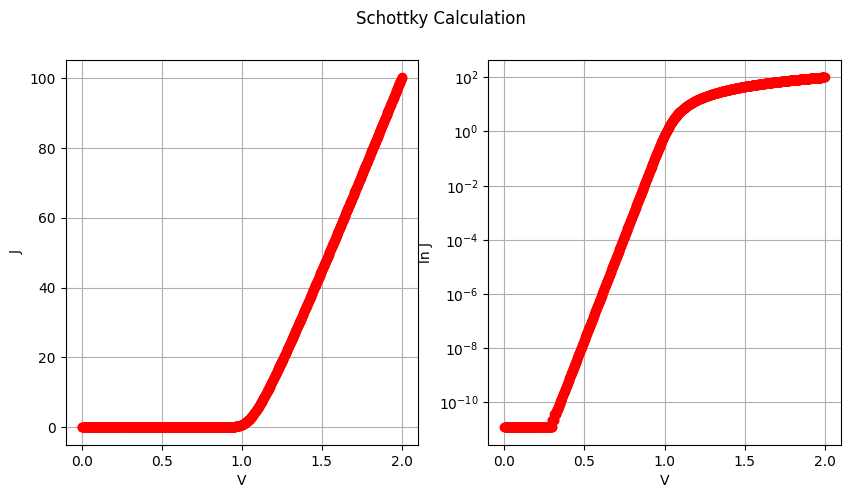

In [2]:
# Ga2O3
# # AS = 36 [A/cm2K2]
# # si 8.6 [A/cm2K2]
# phi = 1.3 [eV]
# T=300  [K]
# R=110 [Ohm]　
# n=1.1
# # area= 100micron 8(iametor)-->0.01cm -->7.85e-5cm2

xf = np.linspace(0,2,1000)
yf = stk.inv_schottky_i(V=xf,R=110, phi=1.3, n=1.1, A_eff=7.85e-5, AS=36, T=300)

# データにノイズを載せたい場合
# noise = np.random.normal(0, 0.1, xf.shape)
# ynf = yf + noise

stk.liner_log_plot2(xf,yf)

# R, phi, nを変えていろいろとグラフを書いて見てください

R=slope/A_eff: 1.10e+02, n : 1.100
R : 1.10e+02, phi : 1.300


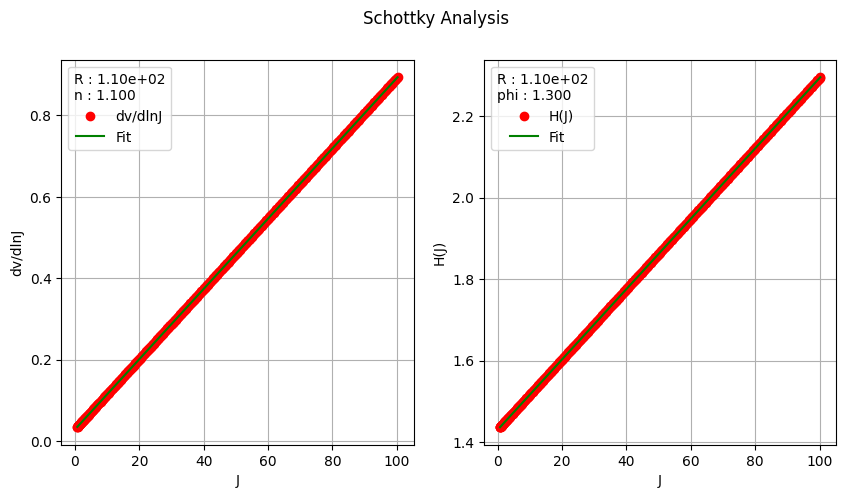

In [5]:
# 解析範囲を変えてみてください
# xmin: 電圧の下限、xmax: 電圧の上限

xf2,yf2 = stk.select_xarray(xf,yf,xmin=1,xmax=2)

# dlnJ_p = stk.dJ_dlnJ_fit_plot(V=xf2, J=yf2, A_eff=7.85e-5, AS=36, T=300, plot=True)
# H_p = stk.H_fit_plot(V=xf2, J=yf2, n=dlnJ_p['n'], A_eff=7.85e-5, AS=36, T=300, plot=True)

res = stk.analysis_all(xf2,yf2, 
                       A_eff= 7.85e-5, AS=36, T=300, 
                       IorJ='J', opt='abs', plot=True)
